In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, learning_curve, LearningCurveDisplay
from sklearn.metrics import mean_squared_error, f1_score

from numpy import linspace, mean
import plotly.express as px

### Carregar e visualizar os dados - Regressao

In [4]:
# Carregar os daddos - Regressao
df = pd.read_csv('./datasets/dataset_colesterol.csv')

In [5]:
# Visualizar Estrutura
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     1000 non-null   object 
 2   Fumante             1000 non-null   object 
 3   Nível de Atividade  1000 non-null   object 
 4   Idade               1000 non-null   int64  
 5   Peso                1000 non-null   float64
 6   Altura              1000 non-null   int64  
 7   Colesterol          1000 non-null   float64
dtypes: float64(2), int64(3), object(3)
memory usage: 62.6+ KB


In [6]:
# Visualizar Dataframe
df.head(10)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33,85.1,186,199.63
1,2,A,Não,Moderado,68,105.0,184,236.98
2,3,O,Não,Alto,25,64.8,180,161.79
3,4,A,Não,Alto,43,120.2,167,336.24
4,5,AB,Não,Baixo,79,88.5,175,226.23
5,6,B,Não,Baixo,68,66.8,170,185.31
6,7,A,Sim,Baixo,60,117.3,181,289.33
7,8,O,Sim,Moderado,35,86.9,174,216.48
8,9,O,Não,Baixo,62,81.3,166,235.30
9,10,B,Sim,Alto,44,32.7,165,97.79


In [7]:
# Ajustar Dataframe

df.drop('Id', axis=1, inplace=True)

# Aplicar OneHotEncoding nas variaveis categoricas
df = pd.get_dummies(df, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

In [8]:
# DataFrame atualizado 

df

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33,85.1,186,199.63,0,0,1,0,0,1,0,1,0
1,68,105.0,184,236.98,1,0,0,0,1,0,0,0,1
2,25,64.8,180,161.79,0,0,0,1,1,0,1,0,0
3,43,120.2,167,336.24,1,0,0,0,1,0,1,0,0
4,79,88.5,175,226.23,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,31,68.1,166,206.81,0,1,0,0,0,1,0,0,1
996,51,47.7,170,128.03,0,0,0,1,1,0,1,0,0
997,39,85.5,176,211.14,0,1,0,0,1,0,0,1,0
998,61,91.2,161,284.53,0,1,0,0,0,1,0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   int64  
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   int64  
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   uint8  
 5   Grupo Sanguíneo_AB           1000 non-null   uint8  
 6   Grupo Sanguíneo_B            1000 non-null   uint8  
 7   Grupo Sanguíneo_O            1000 non-null   uint8  
 8   Fumante_Não                  1000 non-null   uint8  
 9   Fumante_Sim                  1000 non-null   uint8  
 10  Nível de Atividade_Alto      1000 non-null   uint8  
 11  Nível de Atividade_Baixo     1000 non-null   uint8  
 12  Nível de Atividade_Moderado  1000 non-null   uint8  
dtypes: float64(2), int6

### Treinar Modelo de Regressão Linear, visualizando a curva de aprendizado

In [10]:
# Separar X e y
X = df.drop('Colesterol', axis=1)
y = df['Colesterol']

In [11]:
# Criar o modelo
model_reg = LinearRegression()

In [12]:
# Gerar Scores da Curva de Aprendizado - Regressao
train_size_abs, train_scores, test_scores = learning_curve(model_reg, X, y, train_sizes=linspace(0.1, 0.9, 9), scoring='neg_mean_squared_error', cv=3)

In [13]:
# Train Scores
train_scores

array([[-47.58887954, -76.59138285, -76.59138285],
       [-54.96739056, -89.25681102, -89.25681102],
       [-61.46083982, -82.38125138, -82.38125138],
       [-66.03559246, -81.29023664, -81.29023664],
       [-64.83075138, -83.09325911, -83.09325911],
       [-63.76047578, -78.42545716, -79.28096061],
       [-65.70536361, -78.33851189, -76.7243984 ],
       [-66.88782412, -77.49207795, -76.58744367],
       [-70.3254912 , -79.61395088, -76.84383826]])

In [14]:
# Quantidade de instancias usadas

train_size_abs

array([ 66, 133, 199, 266, 333, 399, 466, 532, 599])

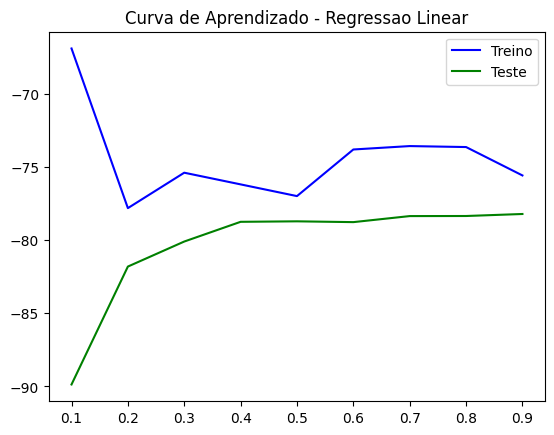

In [17]:
# Gerar Plot com Curva de Aprendizado
plt.plot(linspace(0.1, 0.9, 9), mean(train_scores, axis=1), color='b', label='Treino')
plt.plot(linspace(0.1, 0.9, 9), mean(test_scores, axis=1), color='g', label='Teste')
plt.title('Curva de Aprendizado - Regressao Linear')
plt.legend()
plt.show()

### Carregar e preparar dados - Classificaçao


In [18]:
# Carregar o dataset
df2 = pd.read_csv('./datasets/fruit_quality.csv')

In [19]:
# Visualizar estrutura 
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [20]:
# Visualizar DF
df2.head(10)


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
5,5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,bad
6,6,1.331606,1.635956,0.875974,-1.677798,3.106344,-1.847417,2.414171,good
7,7,-1.995462,-0.428958,1.530644,-0.742972,0.158834,0.974438,-1.470125,good
8,8,-3.867632,-3.734514,0.986429,-1.207655,2.292873,4.080921,-4.871905,bad
9,9,-0.727983,-0.442820,-4.092223,0.597513,0.393714,1.620857,2.185608,bad


In [21]:
# Ajustar Dataframe

# Remover a coluna 'A_id'
df2.drop('A_id', axis=1, inplace=True)

df2['Quality'] = (df2['Quality'] == 'good').astype(int)

df2

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,1
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,1


#### Treinar modelo de KNN com mudança de K

In [22]:
# Separar X e y
X = df2.drop('Quality', axis=1)
y = df2['Quality']

In [23]:
# Separar Treino e Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [24]:
# Faz um loop para treinar um modelo com diversas quantidades de vizinhos (K)
scores_train = []
scores_test = []
for i in range(1, 20, 2):
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    scores_train.append(f1_score(y_train, y_train_pred))
    scores_test.append(f1_score(y_test, y_test_pred))
    print(f'{i}: F1_Train:{f1_score(y_train, y_train_pred)} F1_Test:{f1_score(y_test, y_test_pred)}')

1: F1_Train:1.0 F1_Test:0.8740617180984154
3: F1_Train:0.9452103216684341 F1_Test:0.8964941569282137
5: F1_Train:0.9262266148958701 F1_Test:0.8985985160758451
7: F1_Train:0.921935711762628 F1_Test:0.8929460580912864
9: F1_Train:0.9186704384724187 F1_Test:0.8913043478260869
11: F1_Train:0.9178130511463845 F1_Test:0.8887029288702929
13: F1_Train:0.9115983026874116 F1_Test:0.8881469115191987
15: F1_Train:0.9133969600565571 F1_Test:0.890728476821192
17: F1_Train:0.9099258212645708 F1_Test:0.8883333333333333
19: F1_Train:0.9115885875308207 F1_Test:0.885


In [27]:
# Criar um Dataframe com os scores
df_results = pd.DataFrame({'k': range(1, 20, 2), 'train': scores_train, 'test': scores_test})

In [28]:
df_results

,k,train,test
0,1,1.000000,0.874062
1,3,0.945210,0.896494
2,5,0.926227,0.898599
3,7,0.921936,0.892946
4,9,0.918670,0.891304
5,11,0.917813,0.888703
6,13,0.911598,0.888147
7,15,0.913397,0.890728
8,17,0.909926,0.888333
9,19,0.911589,0.885000


In [29]:
# Mostrar Plot com Scores
xaxis = x= [i for i in range(1, 20, 2)]
fig = px.line(df_results, x='k', y=['train', 'test'], title='KNN Performance - Mudando K')
fig.update_xaxes(tickvals=xaxis, ticktext=[str(i) for i in x])
fig.show()